In [2]:
import os
import pandas as pd
from os.path import join

# 整理資料
- 使用資料夾 'data/small-movie_duplicate_dual-only/' 
    - 只含有 dual 的影像資料
    - CSV 文件 "DESCRIPTION_dual-only.csv" 是從 "歡summary-mannual-inspection-0709-2018 -template 4_filename-revised.csv" 留下有 "dual" 檔名的影片

In [3]:
# SETTING
img_folder = 'data/small-movie_duplicate_dual-only/'
movie_format = '.tif'
keep_filename = 'dual' # only read filename with "dual"
dataset = pd.read_csv(join(img_folder, 'DESCRIPTION_dual-only.csv'))
dataset_full =  pd.read_csv(join(img_folder, 'DESCRIPTION_dual-only_full-classification.csv'))

In [4]:
# DATASET
print(len(dataset))
dataset.head()

102


,FileName_TIFF,concentration at division furrow,stretching,thinning before fission,spindle length (pixel),start anaphase,start concentration,start cytokinesis,start stretching,complete division,...,daughter nuclear intensity variance,daughter mitochondrial area 1,daughter mitochonrial area 2,daughter mitochondrial intensity 1,daughter mitochondrial intensity 2,daughter mitochondrial area variance,daughter mitochondrial intensity variance,notes,coverage of duration,total recorded frame number
0,11302017_c1_dual_decon-asymmetric-partition.tif,n,y,y,516,272,na,335,430,585,...,0.064936998,146465,114962,13990221,10231039,0.120504003,0.155201753,NaN,metaphase-division,794.0
1,11302017_c10_dual_decon-normal.tif,y,y,n,584,74,270,404,509,616,...,0.035595805,136360,137504,10350530,11236200,0.004177256,0.041028447,NaN,metaphase-division,616.0
2,11302017_c3_dual_decon-normal.tif,y,y,y,533,48,153,252,361,433,...,0.107123687,179307,185906,10580725,9292270,0.018068908,0.064834465,NaN,metaphase-division,541.0
3,11302017_c5_dual_decon-normal-fragmented-mitoc...,y,y,n,565,530,643,773,888,1011,...,0.005555904,102456,144941,7451140,8993119,0.171728032,0.093770051,short tubules,metaphase-division,1130.0
4,11302017_c6_dual_decon-normal.tif,y,y,n,530,35,157,280,365,518,...,0.245671761,175847,205592,10102398,12035841,0.077981014,0.087334995,several large granules,metaphase-division,679.0


# 查看細胞分裂狀態的缺失情形
- 留下有完整分裂資訊的檔名 ("DESCRIPTION_dual-only_full-classification.csv")

In [102]:
from math import isnan

In [80]:
dataset['start anaphase'][0].isnumeric()

True

In [105]:
d = dataset.copy()
for i in range(0, len(d)):
    a = d['start anaphase'][i]
    b = d['start concentration'][i]
    c = d['start cytokinesis'][i]
    d1 = d['start stretching'][i]
    e =  d['complete division'][i]
    
    a, b, c, d1, e = str(a), str(b), str(c), str(d1), str(e)
    
    if a.isnumeric() and b.isnumeric() and c.isnumeric() and d1.isnumeric() and e.isnumeric():
        pass
    else:
        d = d.drop([i])

# Image Preprocessing - An Example

In [7]:
import matplotlib.pyplot as plt

In [8]:
from skimage import io

# Function
def get_dir(index):
    v_name = dataset_full['FileName_TIFF'][index]
    v_name = join(img_folder, v_name)
    return v_name

# Sample Video
v_name = get_dir(0)
v_name2 = get_dir(1)

# Read Video
video = io.imread(v_name)
video2 = io.imread(v_name2)

In [9]:
video.shape

(616, 350, 350, 3)

[time,x,y,channel]

|channel|type|
|---|---|
|0|nucleus|
|1|mitochondria|
|2|nucleus|

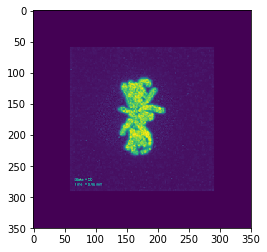

In [20]:
plt.imshow(video[50,:,:,0])

#### video3 = io.imread(get_dir(10))
#plt.imshow(video3)

In [ ]:
video3.shape

# Separate Videos for classification
將影像分割不同 stage, 進行 classification

In [116]:
dataset_full.head()

,Unnamed: 0,FileName_TIFF,concentration at division furrow,stretching,thinning before fission,spindle length (pixel),start anaphase,start concentration,start cytokinesis,start stretching,...,daughter nuclear intensity variance,daughter mitochondrial area 1,daughter mitochonrial area 2,daughter mitochondrial intensity 1,daughter mitochondrial intensity 2,daughter mitochondrial area variance,daughter mitochondrial intensity variance,notes,coverage of duration,total recorded frame number
0,1,11302017_c10_dual_decon-normal.tif,y,y,n,584,74,270,404,509,...,0.035596,136360,137504,10350530,11236200,0.004177,0.041028,NaN,metaphase-division,616.0
1,2,11302017_c3_dual_decon-normal.tif,y,y,y,533,48,153,252,361,...,0.107124,179307,185906,10580725,9292270,0.018069,0.064834,NaN,metaphase-division,541.0
2,3,11302017_c5_dual_decon-normal-fragmented-mitoc...,y,y,n,565,530,643,773,888,...,0.005556,102456,144941,7451140,8993119,0.171728,0.093770,short tubules,metaphase-division,1130.0
3,4,11302017_c6_dual_decon-normal.tif,y,y,n,530,35,157,280,365,...,0.245672,175847,205592,10102398,12035841,0.077981,0.087335,several large granules,metaphase-division,679.0
4,6,11302017_c8_dual_decon-normal-short-few.tif,y,y,y,428,30,144,282,356,...,0.008138,122043,126390,9477118,9794184,0.017498,0.016453,good,metaphase-division,509.0


In [117]:
dataset.keys()

Index(['FileName_TIFF', 'concentration at division furrow', 'stretching',
       'thinning before fission', 'spindle length (pixel)', 'start anaphase',
       'start concentration', 'start cytokinesis', 'start stretching',
       'complete division', 'daughter nuclear area 1',
       'daughter nuclear area 2', 'daughter nuclear intensity 1',
       'daughter nuclear intensity 2', 'daughter nuclear area variance',
       'daughter nuclear intensity variance', 'daughter mitochondrial area 1',
       'daughter mitochonrial area 2', 'daughter mitochondrial intensity 1',
       'daughter mitochondrial intensity 2',
       'daughter mitochondrial area variance',
       'daughter mitochondrial intensity variance', 'notes',
       'coverage of duration', 'total recorded frame number'],
      dtype='object')

In [55]:
video_phase = {
    'anaphase': [],
    'concentration': [],
    'cytokinesis': [],
    'stretching': [],
    'g0':[]
}

ch = {
    'nuc': 0,
    'mito': 1
}

In [56]:
for i, video_name in enumerate(dataset_full['FileName_TIFF']):
    
    # Read Video
    video = io.imread(join(img_folder, video_name))
    
    # Phase 
    anaphase_start, anaphase_end = dataset_full['start anaphase'][i] - 1,  dataset_full['start concentration'][i] -1
    
    concentration_start, concentration_end = dataset_full['start concentration'][i]-1, dataset_full['start cytokinesis'][i]-1
    
    cytokinesis_start, cytokinesis_end = dataset_full['start cytokinesis'][i]-1, dataset_full['start stretching'][i]-1
    
    stretching_start, stretching_end = dataset_full['start stretching'][i]-1, dataset_full['complete division'][i]-1
    
    # Set Integer
    anaphase_start, anaphase_end = int(anaphase_start), int(anaphase_end)
    concentration_start, concentration_end = int(concentration_start), int(concentration_end)
    cytokinesis_start, cytokinesis_end = int(cytokinesis_start), int(cytokinesis_end)
    stretching_start, stretching_end = int(stretching_start), int(stretching_end)
    
    # Store images
    
    video_phase['anaphase'].append(video[anaphase_start: anaphase_end,:,:,ch['nuc']])
    video_phase['concentration'].append(video[concentration_start: concentration_end,:,:,ch['nuc']])
    video_phase['cytokinesis'].append(video[cytokinesis_start: cytokinesis_end,:,:,ch['nuc']])
    video_phase['stretching'].append(video[stretching_start:stretching_end,:,:,ch['nuc']])
    video_phase['g0'].append(video[0:anaphase_start,:,:,ch['nuc']])
    video_phase['g0'].append(video[stretching_end:,0,0,ch['nuc']])
    
    """
    # Anaphase
    for img in video[anaphase_start: anaphase_end,:,:,ch['nuc']]:
        video_phase['anaphase'].append(img)
    # Concentration
    for img in video[concentration_start: concentration_end,:,:,ch['nuc']]:
        video_phase['concentration'].append(img)
    # Cytokinesis
    for img in video[cytokinesis_start: cytokinesis_end,:,:,ch['nuc']]:
        video_phase['cytokinesis'].append(img)
    # Stretching
    for img in video[stretching_start:stretching_end,:,:,ch['nuc']]:
        video_phase['stretching'].append(img)
    # G0 phase
    for img in video[0:anaphase_start,:,:,ch['nuc']]:
        video_phase['g0'].append(img)
   
    for img in video[stretching_end:,0,0,ch['nuc']]:
        video_phase['g0'].append(img)
    """    
        
        
        
        
        
        

In [57]:
for i in video_phase.keys():
    print('{}:{}'.format(i, len(video_phase[i])))

anaphase:22
concentration:22
cytokinesis:22
stretching:22
g0:44


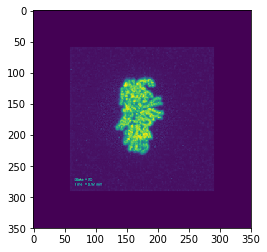

In [60]:
plt.imshow(video_phase['anaphase'][0][0,:,:])

# 儲存分割好的 dataset

In [61]:
import pickle
file = open('video_phases_combined.pickle', 'wb')
pickle.dump(video_phase, file)
file.close()

In [50]:
with open('video_phases.pickle', 'rb') as file:
    a_dict1 =pickle.load(file)

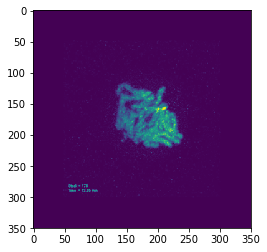

In [51]:
plt.imshow(a_dict1['anaphase'][700])